In [1]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import linregress

In [3]:
data_science = Path("../Resources/data_science_salaries.csv")
data_science_df = pd.read_csv(data_science)
data_science_df

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium
...,...,...,...,...,...,...,...,...,...,...,...
6594,Staff Data Analyst,Entry-level,Contract,Hybrid,2020,Canada,60000,CAD,44753,Canada,Large
6595,Staff Data Analyst,Executive-level,Full-time,On-site,2020,Nigeria,15000,USD,15000,Canada,Medium
6596,Machine Learning Manager,Senior-level,Full-time,Hybrid,2020,Canada,157000,CAD,117104,Canada,Large
6597,Data Engineer,Mid-level,Full-time,Hybrid,2020,Austria,65000,EUR,74130,Austria,Large


In [5]:
data_science_df.info

<bound method DataFrame.info of                      job_title experience_level employment_type work_models  \
0                Data Engineer        Mid-level       Full-time      Remote   
1                Data Engineer        Mid-level       Full-time      Remote   
2               Data Scientist     Senior-level       Full-time      Remote   
3               Data Scientist     Senior-level       Full-time      Remote   
4                 BI Developer        Mid-level       Full-time     On-site   
...                        ...              ...             ...         ...   
6594        Staff Data Analyst      Entry-level        Contract      Hybrid   
6595        Staff Data Analyst  Executive-level       Full-time     On-site   
6596  Machine Learning Manager     Senior-level       Full-time      Hybrid   
6597             Data Engineer        Mid-level       Full-time      Hybrid   
6598            Data Scientist     Senior-level       Full-time     On-site   

      work_year emp

In [6]:
data_science_df['job_title'].value_counts()

job_title
Data Engineer                1307
Data Scientist               1243
Data Analyst                  910
Machine Learning Engineer     629
Analytics Engineer            246
                             ... 
Deep Learning Researcher        1
Power BI Developer              1
Marketing Data Scientist        1
AI Product Manager              1
Sales Data Analyst              1
Name: count, Length: 132, dtype: int64

In [7]:
data_science_df['job_title'] = data_science_df['job_title'].replace({'BI Data Analyst': 'Business Intelligence Analyst', 
                                                               'Power BI Developer': 'Business Intelligence Analyst',                                                              
                                                               'BI Developer': 'Business Intelligence Developer',
                                                               'BI Analyst': 'Business Intelligence Analyst',
                                                               'Business Data Analyst': 'Data Analyst',
                                                               'Big Data Engineer': 'Data Engineer',
                                                               'Data Science Manager': 'Data Scientist',
                                                               'Data Scientist Lead': 'Data Scientist',
                                                               'Data Infrastructure Engineer': 'Data Engineer',
                                                               'Data Operations Engineer': 'Data Engineer',
                                                               'Cloud Data Engineer': 'Data Engineer',
                                                               'Data Integration Engineer': 'Data Engineer',
                                                               'Data Management Analyst': 'Data Analyst',
                                                               'Financial Data Analyst': 'Data Analyst',
                                                               'Finance Data Analyst': 'Data Analyst',
                                                               'AI Architect': 'AI Related',
                                                               'AI Developer': 'AI Related',
                                                               'AI Engineer': 'AI Related',
                                                               'AI Product Manager': 'AI Related',
                                                               'AI Programmer': 'AI Related',
                                                               'AI Research Engineer': 'AI Related',
                                                               'AI Scientist': 'AI Related',
                                                               'Data Science': 'Data Scientist', 
                                                               'Data Visualization Analyst': 'Data Analyst',
                                                               'BI Data Engineer': 'Data Engineer',
                                                                'Data Visualization Engineer': 'Data Engineer',
                                                                'Head of Data Science': 'Data Scientist',
                                                                'Lead Data Analyst': 'Data Analyst',
                                                                'Lead Data Engineer': 'Data Engineer',
                                                                'Lead Data Scientist': 'Data Scientist',
                                                                'Lead Machine Learning Engineer': 'Machine Learning Engineer',
                                                                'Machine Learning Infrastructure Engineer': 'Machine Learning Engineer',
                                                                'Machine Learning Operations Engineer': 'Machine Learning Engineer',
                                                                'Machine Learning Research Engineer': 'Machine Learning Engineer',
                                                                'Machine Learning Software Engineer': 'Machine Learning Engineer',
                                                                'Marketing Data Engineer': 'Data Engineer',
                                                                'Marketing Data Scientist': 'Data Scientist',
                                                                'Marketing Data Analyst': 'Data Analyst',
                                                                'Principal Data Analyst': 'Data Analyst',
                                                                'Principal Data Engineer': 'Data Engineer',
                                                                'Principal Data Scientist': 'Data Scientist',
                                                                'Product Data Analyst': 'Data Analyst',
                                                                'Sales Data Analyst': 'Sales Data Analyst',
                                                                'Software Data Engineer': 'Data Engineer',
                                                                'Staff Data Analyst': 'Data Analyst',
                                                                'Staff Data Scientist': 'Data Scientist',
                                                                'Staff Machine Learning Engineer': 'Machine Learning Engineer',
                                                                'Principal Machine Learning Engineer': 'Machine Learning Engineer',})

In [8]:
data_science_df['job_title'].value_counts()

job_title
Data Scientist                   1422
Data Engineer                    1367
Data Analyst                      962
Machine Learning Engineer         690
Analytics Engineer                246
                                 ... 
Consultant Data Engineer            1
Deep Learning Researcher            1
Analytics Engineering Manager       1
AWS Data Architect                  1
Sales Data Analyst                  1
Name: count, Length: 86, dtype: int64

In [9]:
#data_science_df = data_science_df.set_index(["job_title"])
#data_science_df = data_science_df.loc[["Data Scientist", "Data Engineer", 
                                       #"Data Analyst", "Machine Learning Engineer", 
                                       #"Analytics Engineer"]]
#data_science_df

In [10]:
selected_job_titles = ["Data Scientist", "Data Engineer", "Data Analyst", "Machine Learning Engineer", "Analytics Engineer"]
data_science_df = data_science_df[data_science_df["job_title"].isin(selected_job_titles)]
data_science_df

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
8,Data Engineer,Executive-level,Full-time,Remote,2024,United States,219650,USD,219650,United States,Medium
...,...,...,...,...,...,...,...,...,...,...,...
6593,Data Scientist,Senior-level,Full-time,Remote,2020,Germany,130000,EUR,148261,Germany,Medium
6594,Data Analyst,Entry-level,Contract,Hybrid,2020,Canada,60000,CAD,44753,Canada,Large
6595,Data Analyst,Executive-level,Full-time,On-site,2020,Nigeria,15000,USD,15000,Canada,Medium
6597,Data Engineer,Mid-level,Full-time,Hybrid,2020,Austria,65000,EUR,74130,Austria,Large


In [11]:
data_science_df= data_science_df.loc[data_science_df["salary_currency"] == "USD", :]
data_science_df

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
8,Data Engineer,Executive-level,Full-time,Remote,2024,United States,219650,USD,219650,United States,Medium
...,...,...,...,...,...,...,...,...,...,...,...
6556,Data Analyst,Entry-level,Contract,Remote,2020,United States,100000,USD,100000,United States,Large
6557,Data Scientist,Mid-level,Full-time,On-site,2020,United Arab Emirates,115000,USD,115000,United Arab Emirates,Large
6560,Data Engineer,Senior-level,Full-time,Hybrid,2020,New Zealand,125000,USD,125000,New Zealand,Small
6572,Data Analyst,Mid-level,Full-time,On-site,2020,Honduras,20000,USD,20000,Honduras,Small


In [12]:
data_science_df= data_science_df.loc[data_science_df["company_location"] == "United States", :]
data_science_df

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
8,Data Engineer,Executive-level,Full-time,Remote,2024,United States,219650,USD,219650,United States,Medium
...,...,...,...,...,...,...,...,...,...,...,...
6552,Data Scientist,Mid-level,Full-time,Remote,2020,United States,138350,USD,138350,United States,Medium
6553,Data Engineer,Mid-level,Full-time,Remote,2020,Spain,130800,USD,130800,United States,Medium
6554,Data Scientist,Senior-level,Full-time,Remote,2020,United States,412000,USD,412000,United States,Large
6555,Data Scientist,Entry-level,Full-time,Remote,2020,United States,105000,USD,105000,United States,Small


In [13]:
data_science_df["work_year"].unique()

array([2024, 2023, 2022, 2021, 2020])

In [14]:
clean_data_df = data_science_df.loc[data_science_df["work_year"] != 2024]
clean_data_df

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
576,Data Scientist,Mid-level,Full-time,Remote,2023,United States,190000,USD,190000,United States,Medium
577,Data Scientist,Mid-level,Full-time,Remote,2023,United States,160000,USD,160000,United States,Medium
580,Data Engineer,Mid-level,Full-time,Remote,2023,United States,160000,USD,160000,United States,Medium
581,Data Engineer,Mid-level,Full-time,Remote,2023,United States,130000,USD,130000,United States,Medium
582,Data Analyst,Mid-level,Full-time,On-site,2023,United States,85000,USD,85000,United States,Medium
...,...,...,...,...,...,...,...,...,...,...,...
6552,Data Scientist,Mid-level,Full-time,Remote,2020,United States,138350,USD,138350,United States,Medium
6553,Data Engineer,Mid-level,Full-time,Remote,2020,Spain,130800,USD,130800,United States,Medium
6554,Data Scientist,Senior-level,Full-time,Remote,2020,United States,412000,USD,412000,United States,Large
6555,Data Scientist,Entry-level,Full-time,Remote,2020,United States,105000,USD,105000,United States,Small


In [15]:
#clean_data_df= clean_data_df.reset_index(drop=True)
#clean_data_df

In [16]:
experience_salary_df = clean_data_df[["experience_level", "job_title", "salary"]]
experience_salary_df

,experience_level,job_title,salary
576,Mid-level,Data Scientist,190000
577,Mid-level,Data Scientist,160000
580,Mid-level,Data Engineer,160000
581,Mid-level,Data Engineer,130000
582,Mid-level,Data Analyst,85000
...,...,...,...
6552,Mid-level,Data Scientist,138350
6553,Mid-level,Data Engineer,130800
6554,Senior-level,Data Scientist,412000
6555,Entry-level,Data Scientist,105000


In [17]:
experience_salary_df["experience_level"]

576        Mid-level
577        Mid-level
580        Mid-level
581        Mid-level
582        Mid-level
            ...     
6552       Mid-level
6553       Mid-level
6554    Senior-level
6555     Entry-level
6556     Entry-level
Name: experience_level, Length: 3424, dtype: object

In [18]:
experience_level_order = {"Entry-level": 1,
                          "Mid-level": 2,
                          "Senior-level": 3,
                          "Executive-level": 4}
experience_salary_df["experience_level_order"] = experience_salary_df["experience_level"].map(experience_level_order)
experience_salary_df_sorted = experience_salary_df.sort_values(by = ["job_title", "experience_level_order"])
experience_salary_df_sorted = experience_salary_df_sorted.drop(["experience_level_order"], axis = 1)
experience_salary_df_sorted.reset_index(drop = True, inplace =True)
experience_salary_df = experience_salary_df_sorted
experience_salary_df
                              

/var/folders/3v/bzrh0wc57bn90x31h169xt700000gn/T/ipykernel_8749/1939610544.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experience_salary_df["experience_level_order"] = experience_salary_df["experience_level"].map(experience_level_order)


,experience_level,job_title,salary
0,Entry-level,Analytics Engineer,156450
1,Entry-level,Analytics Engineer,119200
2,Entry-level,Analytics Engineer,90000
3,Entry-level,Analytics Engineer,84000
4,Entry-level,Analytics Engineer,130000
...,...,...,...
3419,Executive-level,Machine Learning Engineer,160000
3420,Executive-level,Machine Learning Engineer,200000
3421,Executive-level,Machine Learning Engineer,145000
3422,Executive-level,Machine Learning Engineer,295500


In [19]:
experience_salary_df.groupby(["job_title", "experience_level"])["salary"].mean()
experience_salary_df

,experience_level,job_title,salary
0,Entry-level,Analytics Engineer,156450
1,Entry-level,Analytics Engineer,119200
2,Entry-level,Analytics Engineer,90000
3,Entry-level,Analytics Engineer,84000
4,Entry-level,Analytics Engineer,130000
...,...,...,...
3419,Executive-level,Machine Learning Engineer,160000
3420,Executive-level,Machine Learning Engineer,200000
3421,Executive-level,Machine Learning Engineer,145000
3422,Executive-level,Machine Learning Engineer,295500


In [20]:
top_5_salaries = experience_salary_df.sort_values(by="salary", ascending=False).head(5)
top_5_salaries

,experience_level,job_title,salary
2318,Senior-level,Data Scientist,750000
2971,Mid-level,Machine Learning Engineer,750000
1002,Mid-level,Data Engineer,750000
37,Senior-level,Analytics Engineer,700000
11,Mid-level,Analytics Engineer,700000


Text(0.5, 1.0, 'Top 5 Job titles with their avg salary')

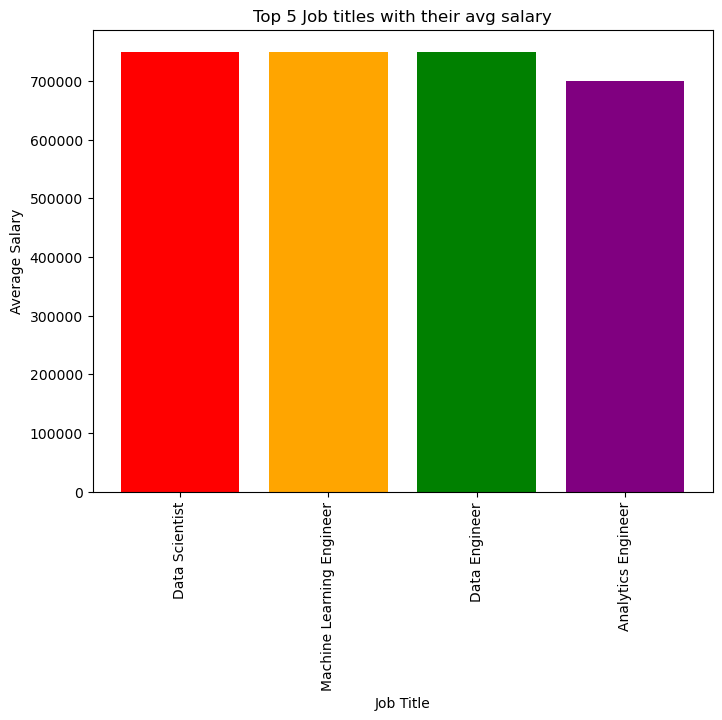

In [21]:
plt.figure(figsize=(8, 6))
plt.bar(top_5_salaries['job_title'], top_5_salaries['salary'], color=['red', 'orange', 'green', 'blue', 'purple'])
plt.xlabel('Job Title')
plt.xticks(rotation=90)
plt.ylabel('Average Salary')
plt.title('Top 5 Job titles with their avg salary')

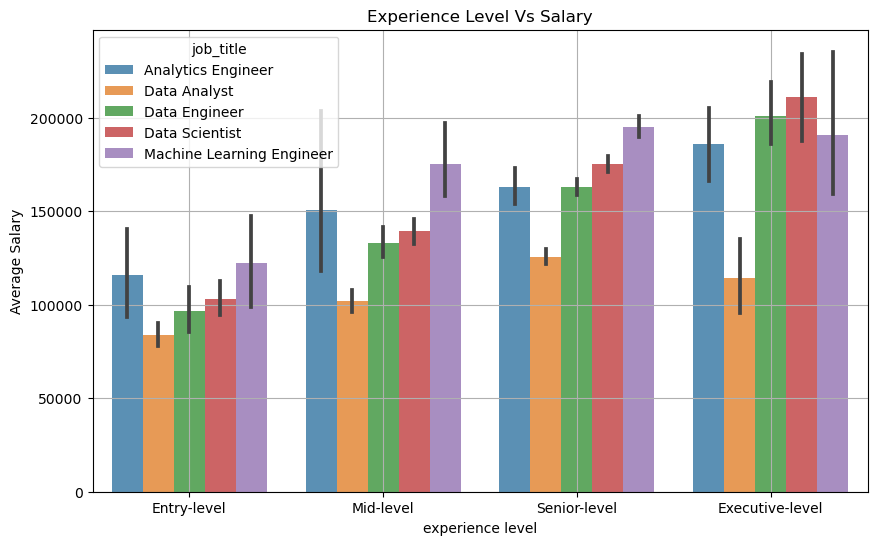

<Figure size 640x480 with 0 Axes>

In [22]:
plt.figure(figsize = (10,6))
sns.barplot(x = "experience_level", y = "salary", hue = "job_title", data = experience_salary_df, alpha = 0.8)
plt.xlabel("experience level")
plt.ylabel("Average Salary")
plt.title("Experience Level Vs Salary")
plt.grid(True)
plt.show()
plt.savefig("Q1")

In [23]:
entry_level_df = experience_salary_df.loc[experience_salary_df["experience_level"] == "Entry-level", :]
entry_level_df = entry_level_df.drop(["experience_level"], axis = 1)

In [24]:
entry_level_df

,job_title,salary
0,Analytics Engineer,156450
1,Analytics Engineer,119200
2,Analytics Engineer,90000
3,Analytics Engineer,84000
4,Analytics Engineer,130000
...,...,...
2958,Machine Learning Engineer,83000
2959,Machine Learning Engineer,125000
2960,Machine Learning Engineer,81000
2961,Machine Learning Engineer,250000


/Users/chuchu/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chuchu/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chuchu/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/chuchu/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprec

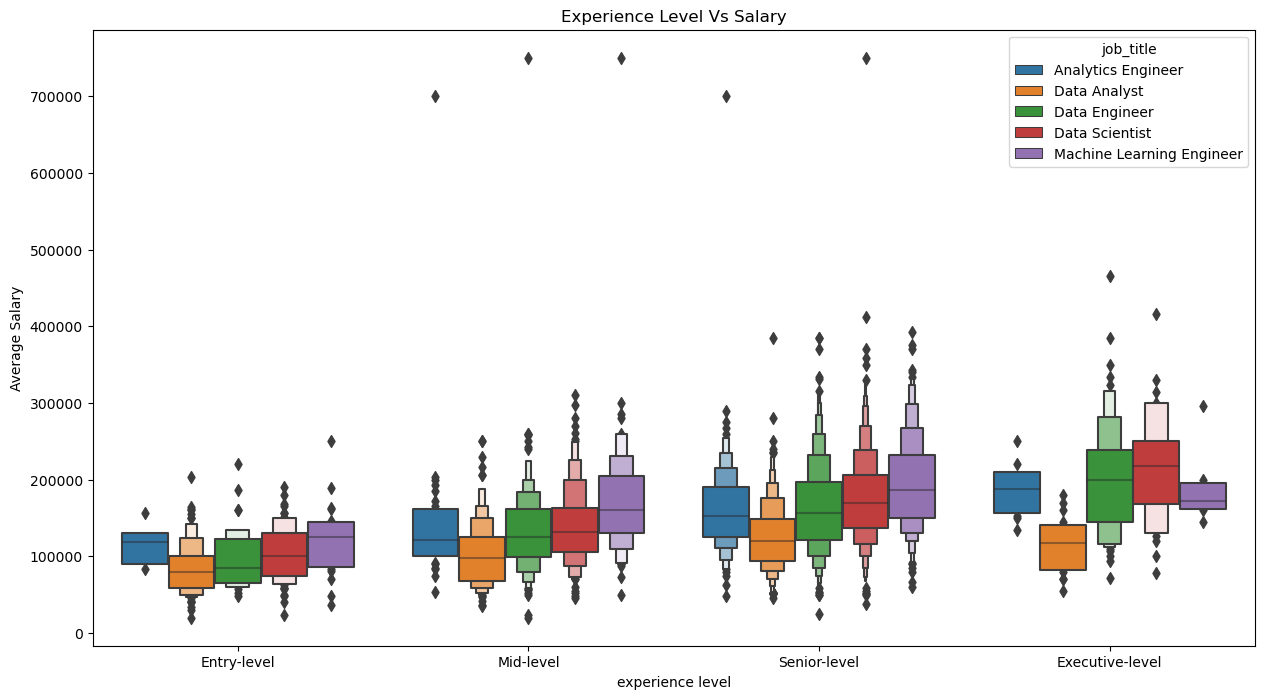

<Figure size 640x480 with 0 Axes>

In [25]:

plt.figure(figsize=(15, 8))
sns.boxenplot(x='experience_level', y='salary', hue = "job_title", data=experience_salary_df)
plt.xlabel("experience level")
plt.ylabel("Average Salary")
plt.title("Experience Level Vs Salary")
plt.show()
plt.savefig("Q1-2")

In [26]:
#Comparison of different experience levels of a position under the same title (salary they earn)

In [27]:
#title_vs_salary_df = data_df.sort_values("work_year")
#title_vs_salary_df


In [28]:
#group_title_vs_salary_df = data_df.groupby(["job_title"])
#print(group_title_vs_salary_df)
#group_title_vs_salary_df.head()